In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.rcParams.update({'font.family': 'serif'})
pi = np.pi
e = np.e

In [ ]:
# #Output
# outputfile = ./

# #Evolution
# expansion = true
# evolver = VV2

# #Lattice
# N = 132
# dt = 0.1
# L = 274509.8039215686 #Mpl^-1; 1.4/m

# #Times
# tOutputFreq = 0.1
# tOutputInfreq = 1
# tOutputVerb = 1

# tMax = 10000
# t0 = 0

# #Spectra options
# PS_type = 2
# PS_version = 1

# #GWs
# GWprojectorType = 1
# withGWs = false

# #IC
# initial_amplitudes = 14.5 #Mpl
# initial_momenta= -4.1565e-06 #Mpl^2; 0.815*m
# baseSeed = 1234

# #Model Parameters
# gamma =  2.601e-11 #Mpl^2; m**2


In [48]:
m = 0.51e-5 # Mpl
gamma = m**2 
print('gamma = ', gamma)
initial_amplitudes = 14.5
initial_momenta = -0.815*m
print('initial_momenta = ', initial_momenta)
print('initial_amplitudes = ', initial_amplitudes)
omega = m*initial_amplitudes
print('omega = ', omega)
N = 132 # 128 Caravano
L = 1.4/m
lSide = L*omega
print('lSide = ', lSide)
print('N = ', N)

gamma =  2.6010000000000002e-11
initial_momenta =  -4.1565e-06
initial_amplitudes =  14.5
omega =  7.395000000000001e-05
lSide =  20.3
N =  132


In [54]:
kIR = 2*pi/lSide
kmin = 2*pi/L
V = 0.5*m**2*initial_amplitudes**2
Hin = V**0.5
epsilon = initial_momenta**2/(V)

print('Hin = ', Hin)
print('epsilon = ', epsilon)
print('kIR = ', kIR)
print('kIR/Hin', kIR/Hin)
print('kIR/m = ', kIR/m)
print('kmin/Hin = ', kmin/Hin)
print('kmin/m = ', kmin/m)
print('kmax/Hin = ', kIR * 3**0.5 /2 *N /Hin)

Hin =  5.229054646874519e-05
epsilon =  0.006318430439952437
kIR =  0.3095165175950535
kIR/Hin 5919.167775002236
kIR/m =  60689.513253932055
kmin/Hin =  0.4377224569614154
kmin/m =  4.487989505128276
kmax/Hin =  676651.7554386675


In [21]:
dx = lSide/N
print('dx = ', dx)
dt = 1
print('dt = ', dt)
print('dt/dx < 1/sqrt(3)?', dt/dx < 3**-0.5, dt/dx)
print('largest dt =', dx/(3**0.5))

dx =  2144.607843137255
dt =  1
dt/dx < 1/sqrt(3)? True 0.00046628571428571433
largest dt = 1238.189915541477


In [18]:
path = '../build_caravano/'

# Load data
energies = pd.read_csv(path + 'average_energies.txt', sep='    ', header=None, engine='python').dropna()
energies.columns = ['eta','K','G', 'V', 'rho']

energy_cons = pd.read_csv(path + 'average_energy_conservation.txt', sep='    ', header=None, engine='python').dropna()
energy_cons.columns = ['eta','deltaE','lhs','rhs']

scalar0 = pd.read_csv(path + 'average_scalar_0.txt', sep='    ', header=None, engine='python').dropna()
scalar0.columns = ['eta','phi','phi_prime', 'phi2', 'phi_prime2', 'rms_phi', 'rms_phi_prime']

scale_factor = pd.read_csv(path + 'average_scale_factor.txt', sep='    ', header=None, engine='python').dropna()
scale_factor.columns = ['eta','a','a_prime', 'H']

spectra_time = pd.read_csv(path + 'average_spectra_times.txt', sep='    ', header=None, engine='python').dropna()

# spectra_scalar0 = pd.read_csv(path + 'spectra_scalar_0.txt', sep=' ', header=None, engine='python')
# spectra_scalar0.columns = ['k','S_phi','S_phi_prime','n_k']

In [20]:
Ne = np.log(scale_factor['a'])
Ne

0       0.000000
1       0.002289
2       0.004568
3       0.006837
4       0.009095
          ...   
3839    1.462521
3840    1.462644
3841    1.462768
3842    1.462891
3843    1.463015
Name: a, Length: 3844, dtype: float64

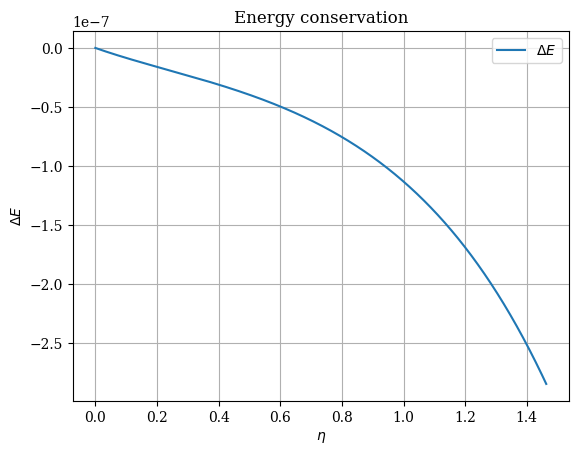

In [22]:
plt.plot(Ne, energy_cons['deltaE'], label=r'$\Delta E$')
# plt.plot(energy_cons['eta'], energy_cons['lhs'], label='lhs')
# plt.plot(energy_cons['eta'], energy_cons['rhs'], '--', label='rhs')

plt.title('Energy conservation')
plt.ylabel(r'$\Delta E$')
plt.xlabel(r'$\eta$')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

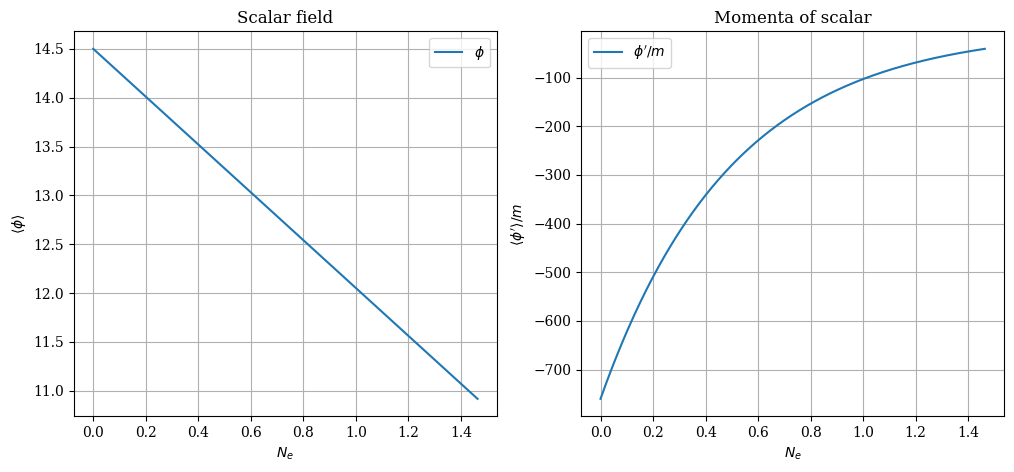

-0.0038763376932223


In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Ne, scalar0['phi']*14.5, label=r'$\phi$')

plt.title('Scalar field')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$N_e$')
# plt.yscale('log')
# plt.ylim(0.99,1.01)

plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(Ne, scalar0['phi_prime']/m, label=r'$\phi^\prime/m$')
plt.title('Momenta of scalar')
# plt.plot(Ne, scalar0['phi2'], label=r'$\phi^2$')
# plt.plot(Ne, scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

# plt.title('Scalar field squared')
# plt.ylabel(r'$\langle\phi^2\rangle$')
plt.ylabel(r'$\langle\phi^\prime\rangle/m$')
plt.xlabel(r'$N_e$')

plt.legend()
plt.grid()
plt.show()
print(scalar0['phi_prime'][0])

0.0229463892895982


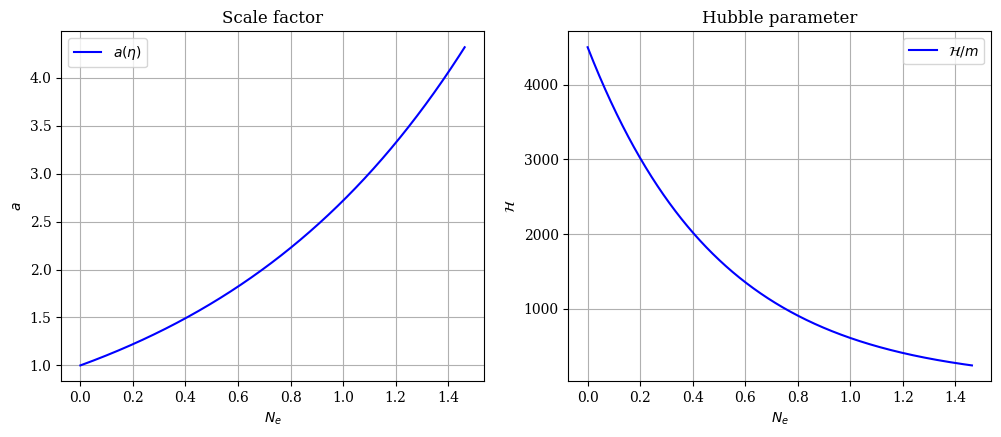

In [38]:
print(scale_factor['H'][0])

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(Ne, scale_factor['a'], label=r'$a(\eta)$', color='blue')
# plt.plot(Ne, np.exp(Ne),'--')
# plt.plot(N_e,np.exp(scale_factor['H']*N_e),'--',label=r'$exp(\mathcal{H}\eta)$')

plt.title('Scale factor')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$a$')

plt.legend()
plt.grid()


plt.subplot(2,2,2)
plt.plot(Ne, scale_factor['H']/m, label=r'$\mathcal{H}/m$', color='blue')
# plt.plot(N_e[21::], 1/N_e[21::], '--', label=r'$1/\eta$')
plt.title('Hubble parameter')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\mathcal{H}$')

plt.legend()
plt.grid()

# plt.subplot(2,2,(3,4))


In [45]:
file = np.loadtxt(path+'spectra_scalar_0.txt') # Se carga el archivo
file = file[~np.isnan(file).any(axis=1)] # Remove rows with NaN values

step = 0 # Vamos a determinar cuántos k tiene cada bloque
i = 1 # Contador de líneas en el bloque
while step==0: # Se detiene cuando le demos un valor
    if file[:,0][i] == file[:,0][0]: # Entra si encuentra un valor igual al primero,
                                     # o sea si el k vuelve a empezar a contar (nuevo bloque)
        step = i # Las veces que tuvo que verificar es la cantidad de líneas por bloque
    i+=1  # Si no es igual pasa a la siguiente
tmax = 0 # Ahora determinamos la cantidad de bloques
j = 0 # Contador de bloques
while tmax==0: 
    try: 
        file[:,0][(i+1)*j] # Intenta leer un valor de bloque en bloque,
                           # si no existe es porque se acabó el archivo
    except:
        tmax = j # La cantidad de bloques es las veces que iteró
    j+=1 # Si el valor existe, pasa al siguiente bloque

data = np.zeros((tmax,step,2)) # Creamos un array de ceros con la forma de los datos
for i in range(tmax): # Llenamos el array con los datos
    try:
        data[i,::,0] = file[step*i:step*(i+1),0] # El primer índice es el bloque, el segundo la linea
        data[i,::,1] = file[step*i:step*(i+1),1] # 0 y 1 son k y P(k) respectivamente
    except: # Si se acaban los datos, se detiene
        break
data

array([[[2.28887000e-05, 3.08378521e-22],
        [4.57775000e-05, 1.03582678e-21],
        [6.86662000e-05, 3.42566250e-21],
        ...,
        [2.56354000e-03, 3.87033725e-18],
        [2.58643000e-03, 4.65116453e-18],
        [2.60932000e-03, 2.14760481e-18]],

       [[2.28887000e-05, 2.94846596e-22],
        [4.57775000e-05, 9.90351212e-22],
        [6.86662000e-05, 3.27529330e-21],
        ...,
        [2.56354000e-03, 3.70303986e-18],
        [2.58643000e-03, 4.44321145e-18],
        [2.60932000e-03, 2.05623659e-18]],

       [[2.28887000e-05, 2.82435383e-22],
        [4.57775000e-05, 9.48642451e-22],
        [6.86662000e-05, 3.13737838e-21],
        ...,
        [2.56354000e-03, 3.54955979e-18],
        [2.58643000e-03, 4.25257182e-18],
        [2.60932000e-03, 1.97238004e-18]],

       ...,

       [[2.28887000e-05, 1.10752668e-23],
        [4.57775000e-05, 3.74497378e-23],
        [6.86662000e-05, 1.23597854e-22],
        ...,
        [2.56354000e-03, 1.75782035e-19],
     

In [47]:
klat_ = data[0,:,0]
klat_

array([2.28887e-05, 4.57775e-05, 6.86662e-05, 9.15550e-05, 1.14444e-04,
       1.37332e-04, 1.60221e-04, 1.83110e-04, 2.05999e-04, 2.28887e-04,
       2.51776e-04, 2.74665e-04, 2.97554e-04, 3.20442e-04, 3.43331e-04,
       3.66220e-04, 3.89109e-04, 4.11997e-04, 4.34886e-04, 4.57775e-04,
       4.80664e-04, 5.03552e-04, 5.26441e-04, 5.49330e-04, 5.72219e-04,
       5.95107e-04, 6.17996e-04, 6.40885e-04, 6.63774e-04, 6.86662e-04,
       7.09551e-04, 7.32440e-04, 7.55329e-04, 7.78217e-04, 8.01106e-04,
       8.23995e-04, 8.46884e-04, 8.69772e-04, 8.92661e-04, 9.15550e-04,
       9.38439e-04, 9.61327e-04, 9.84216e-04, 1.00710e-03, 1.02999e-03,
       1.05288e-03, 1.07577e-03, 1.09866e-03, 1.12155e-03, 1.14444e-03,
       1.16733e-03, 1.19021e-03, 1.21310e-03, 1.23599e-03, 1.25888e-03,
       1.28177e-03, 1.30466e-03, 1.32755e-03, 1.35044e-03, 1.37332e-03,
       1.39621e-03, 1.41910e-03, 1.44199e-03, 1.46488e-03, 1.48777e-03,
       1.51066e-03, 1.53355e-03, 1.55643e-03, 1.57932e-03, 1.602